# Question 1. What is the relationship between year built of a house and sale price?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Need to do this since placed in a folder
os.chdir('../')

In [3]:
df = pd.read_csv("data/king_county_data_clean.csv").drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
sns.set_style('darkgrid')

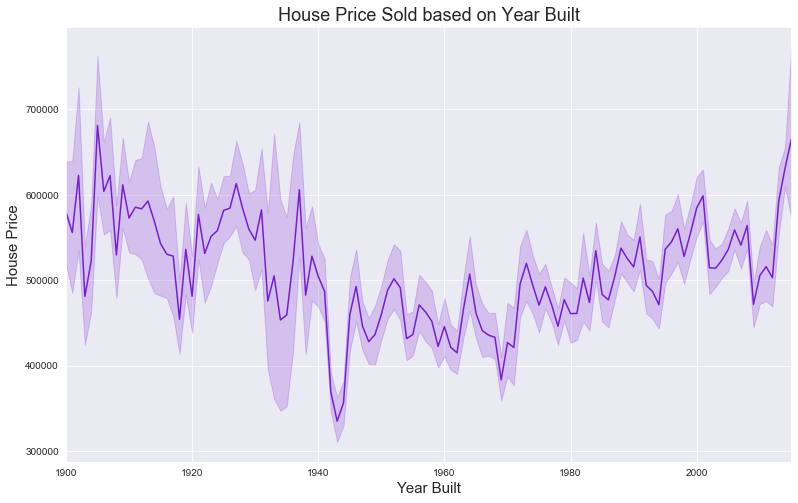

In [8]:
plt.figure(figsize=(13,8))
sns.lineplot(data=df, x='yr_built', y='price', color='#771BD8').set(xlim=(1900, 2015))
plt.xlabel(xlabel='Year Built', size=15)
plt.ylabel(ylabel='House Price', size=15)
plt.title("House Price Sold based on Year Built", size=18)
plt.show()

### Houses built in the early part of the century, between 1900's and 1940's have on average sold for more when compared to houses built past 1940. There is a strong dip in house price for the houses built in 1940-1950, and there has been a significant increase in housing prices for newer construction.

## Question 1b. Does renovation affect the price for which a home will sell?

In [85]:
# Adds new column to dataframe. imports mlines for use in graphing for legend
df['was_renovated'] = np.where(df['yr_renovated']>0, 1, 0)
import matplotlib.lines as mlines

In [86]:
print(len(df[df['was_renovated']==1]))
print(len(df[df['was_renovated']==0]))
(len(df[df['was_renovated']==1])/len(df[df['was_renovated']==0]))*100

663
19894


3.3326631145068863

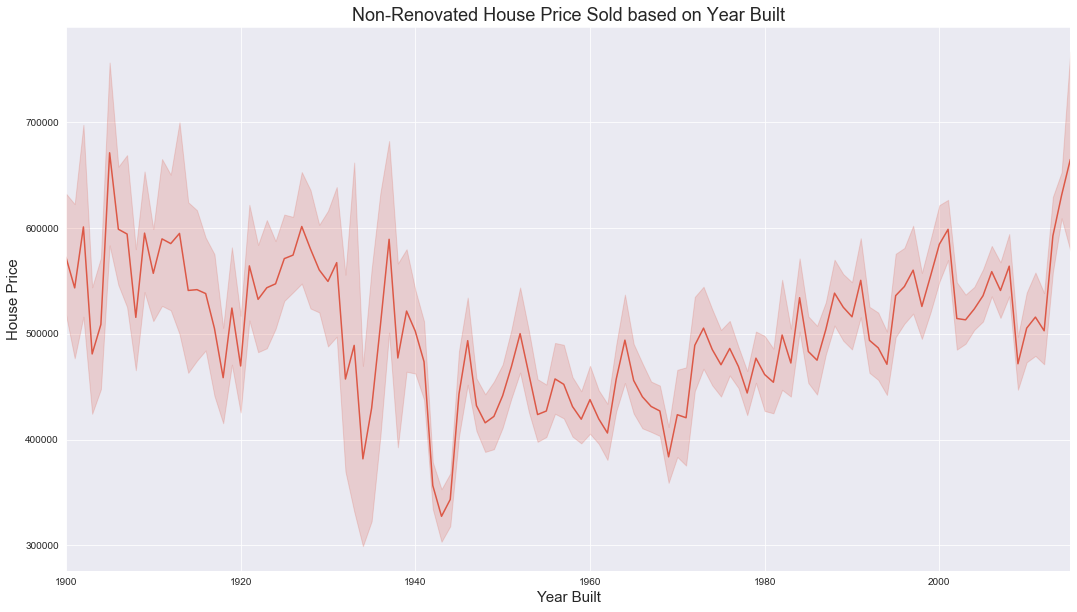

In [87]:
plt.figure(figsize=(18,10))
sns.lineplot(data=df[df['was_renovated']==0], x='yr_built', y='price',color= '#DC5846').set(xlim=(1900, 2015))

plt.xlabel(xlabel='Year Built', size=15)
plt.ylabel(ylabel='House Price', size=15)
plt.title("Non-Renovated House Price Sold based on Year Built", size=18)

plt.show()

## Similarities between the lines of non-renovated and total dataset can be attributed to the fact that most homes are not renovated. The sample size for renovated and not renovated are drastically different, where renovated homes account for less than 4% of the total dataset.

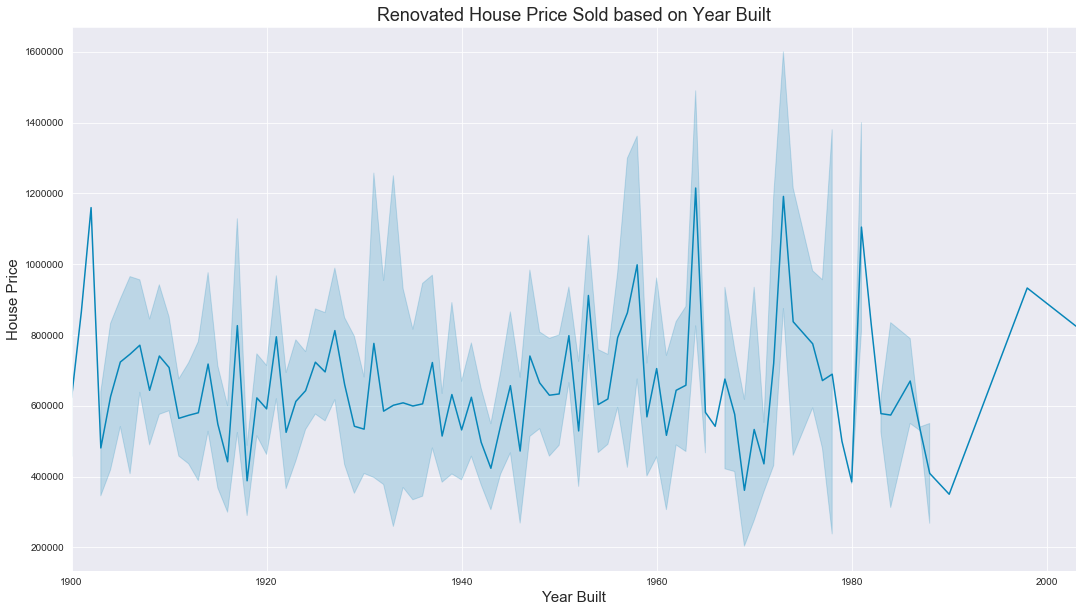

In [88]:
plt.figure(figsize=(18,10))
sns.lineplot(data=df[df['was_renovated']==1], x='yr_built', y='price', color='#0786B9').set(xlim=(1900, 2003))

plt.xlabel(xlabel='Year Built', size=15)
plt.ylabel(ylabel='House Price', size=15)
plt.title("Renovated House Price Sold based on Year Built", size=18)

plt.show()

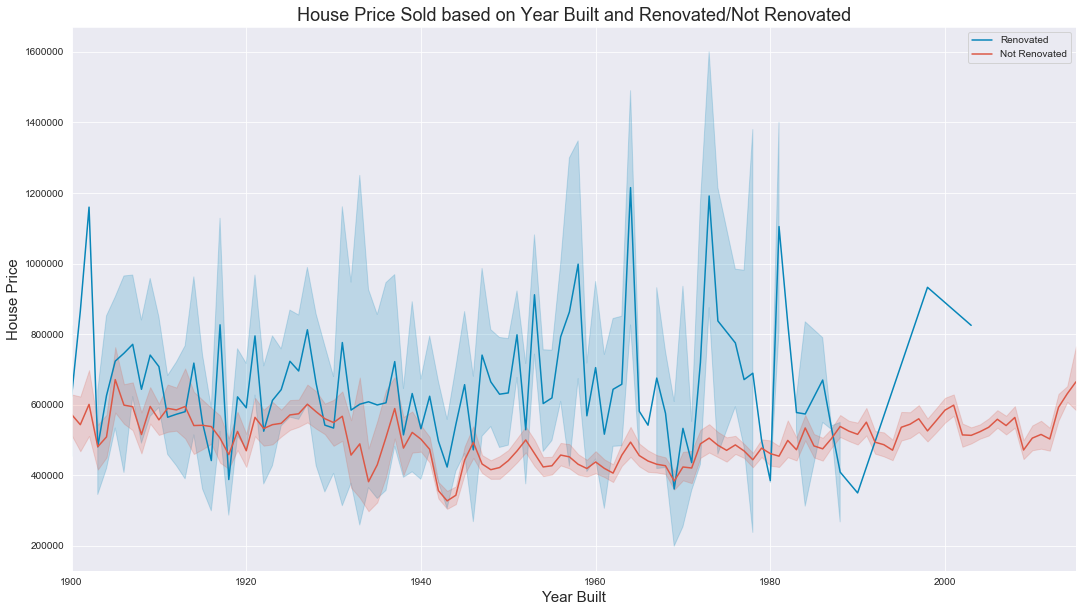

In [89]:
plt.figure(figsize=(18,10))
sns.lineplot(data=df[df['was_renovated']==1], x='yr_built', y='price', color='#0786B9').set(xlim=(1900, 2015))
sns.lineplot(data=df[df['was_renovated']==0], x='yr_built', y='price',color= '#DC5846').set(xlim=(1900, 2015))
plt.xlabel(xlabel='Year Built', size=15)
plt.ylabel(ylabel='House Price', size=15)
plt.title("House Price Sold based on Year Built and Renovated/Not Renovated", size=18)

top_line = mlines.Line2D([], [], color='#0786B9',markersize=15, label='Renovated')
bot_line = mlines.Line2D([], [], color='#DC5846',markersize=15, label='Not Renovated')

plt.legend(handles=[top_line, bot_line])
plt.show()

###  Homes that have not been renovated follow a similar pattern as above--before 1940 has higher price sold with new construction being on the rise--however the range is a lot tighter. If a home has been renovated, on average it will sell for higher than a non-renovated home of the same year, however we do also see that there is a large fluctuation in Price sold. This fluctuation could be in part that we don't know what type of renovation was done to the home. For example, if a house is not up to code, it would need to be renovated and brought up to code if to be sold for people to reside in it upon selling. Taking this into consideration, we can assume that on the low end homes were renovated to be brought up to code and meet base expectations, and on the high end home were renovated to add new features and increase the value of the home above the market average.

## Next perform an anova test

In [90]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price ~ C(was_renovated)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)

In [91]:
table

,sum_sq,df,F,PR(>F)
C(was_renovated),1.368897e+13,1.0,218.811738,2.944355e-49
Residual,1.285931e+15,20555.0,NaN,NaN


## We can consider that there is significant difference between sales prices of houses and whether or not it has been renovated.